# **Predicting Health Insurance Price for an individual or family**

# ***Introduction:***
### The health insurance domain is a sector of the insurance industry that focuses on providing **coverage for medical expenses and related costs.**

### This includes **health plans for individuals and groups,** as well as other types of insurance policies related to healthcare.

### **Insurer:**
### An entity which creates plan, sell policy and reimburses policy holder or provider for the submitted valid claims.

### **Policy Holder:**
### Healthcare policyholder
### A person or an entity, who buys the policy from the insurer or BROKER, pays premium to the insurer and sometimes submit claim.

### **Provider:**
### A person or an entity, which provides the health care service to the policy holder and their dependents, either receives payment for the service from the policy holder or from the insurer by submitting a claim.

### **Subscriber:**
### Person who pays the premium and under whom the family is covered

### **Member**
### Who receives medical coverage under a subscriber. Dependents of the family.

### **Claims**
### An invoice from the provider to the doctor for the services rendered.


#***Variables in the dataset:***

**age:** age of the primary beneficiary

**gender:** insurance contractor gender, female, male

**BMI:** Body Mass Index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m²) using the ratio of height to weight, ideally 18.5 to 24.9

**Children:** number of children covered by health insurance, number of dependents

**smoking_status:** smoking or not

**location:** the beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

**health_insurance_price:** individual medical costs billed by health insurance



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt            # importing all the necessary libraries to work on the data set
import numpy as np

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Health_insurance_cost (1).xlsx")   # loading the data set into df variable using pandas

In [ ]:
df.shape    # shape function displays a tuple consisting of total number of rows and columns

(1338, 7)

In [ ]:
df.head()   # head() function displays first 5 rows with all the columns

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()    # info() displays all the columns' data types along with non-null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()    # displays the number of null values for each variable/feature

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

### **1- Why is this proposal important in today’s world? How predicting a health insurance cost accurately can affect the health care/insurance field?**



*   Based on the risk of disease, the premiums can be decided which will be affordable by the public.
*   Ensures proper financial and budget planning by the individuals and households.


*  If the model is able to predict the costs accurately, it helps in risk management by both the patients and the government.
*  Accurate cost prediction ensures that the insurance companies cannot overcharge or undercharge their clients.





### **2- If any, what is the gap in the knowledge, or how your proposed method can be helpful if required in the future for any other type of insurance?**



*   The same model with the given features, can be applied to other insurances as well such as automobile insurance, fire insurance,life insurance etc.,
*   With little modifications the machine learning model can be applied to future predictive problems in various domains.



### **3-  Please aim to identify patterns in the data and important features that may impact an ML model.**

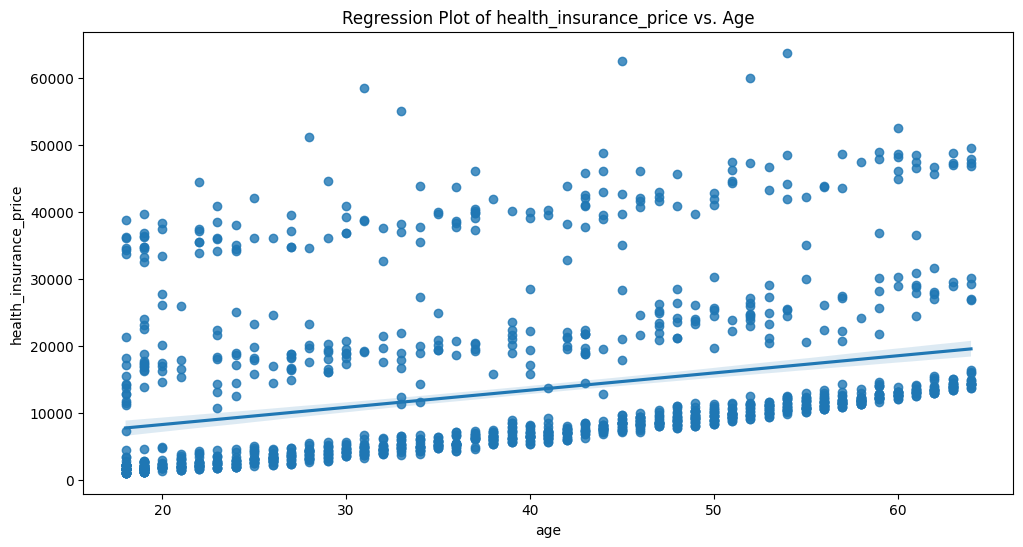

In [ ]:
# we will draw regression plot to see whether the relation is linear or non linear
# regression plot for health_insurance_price vs. age
plt.figure(figsize=(12,6))
sns.regplot(data=df, x='age', y='health_insurance_price')
plt.title("Regression Plot of health_insurance_price vs. Age")
plt.show()

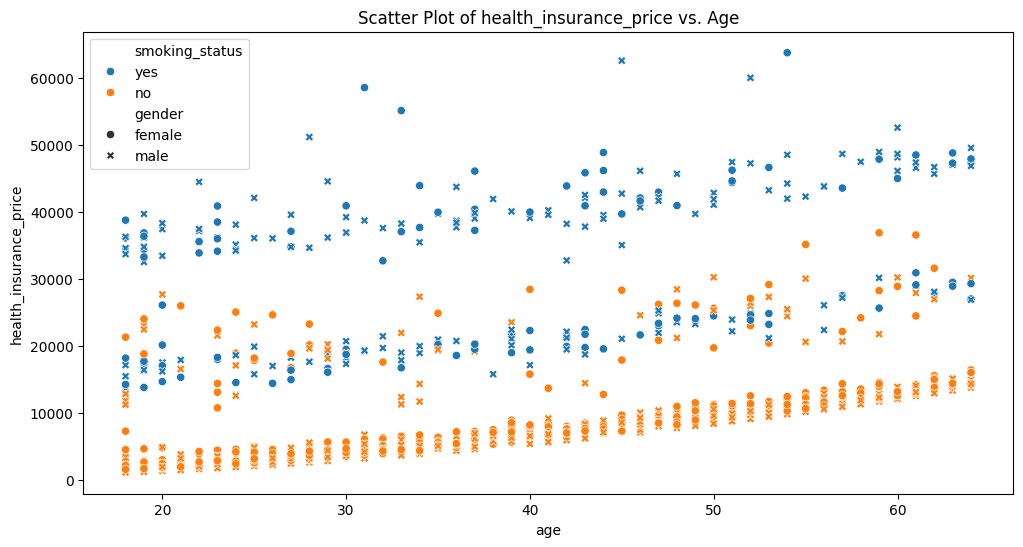

In [ ]:
# we will draw scatterplot to see whether the relation is linear or non linear
# Scatter plot for health_insurance_price vs. age
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='age', y='health_insurance_price',hue="smoking_status",style="gender")
plt.title("Scatter Plot of health_insurance_price vs. Age")
plt.show()

##**Observations:**

From the above graph,it is clear that as the **age is increasing, insurance cost is also increasing** with respect to smoking status too(smokers have high insurance price compared to non-smokers).

There is a **positive linear relationship between these two variables.**

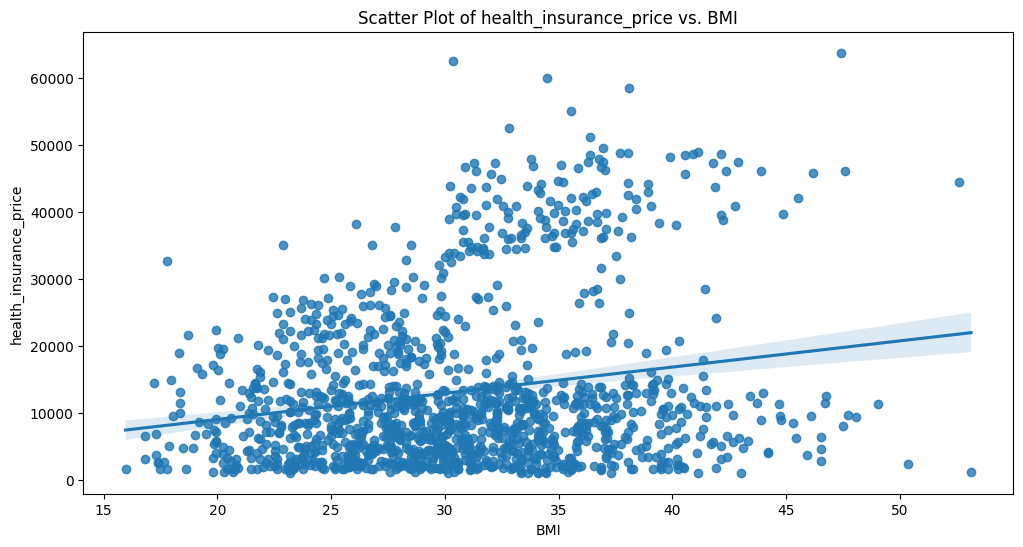

In [ ]:
# Regression plot for health_insurance_price vs. BMI
plt.figure(figsize=(12,6))
sns.regplot(data=df, x='BMI', y='health_insurance_price')
plt.title("Regression Plot of health_insurance_price vs. BMI")
plt.show()

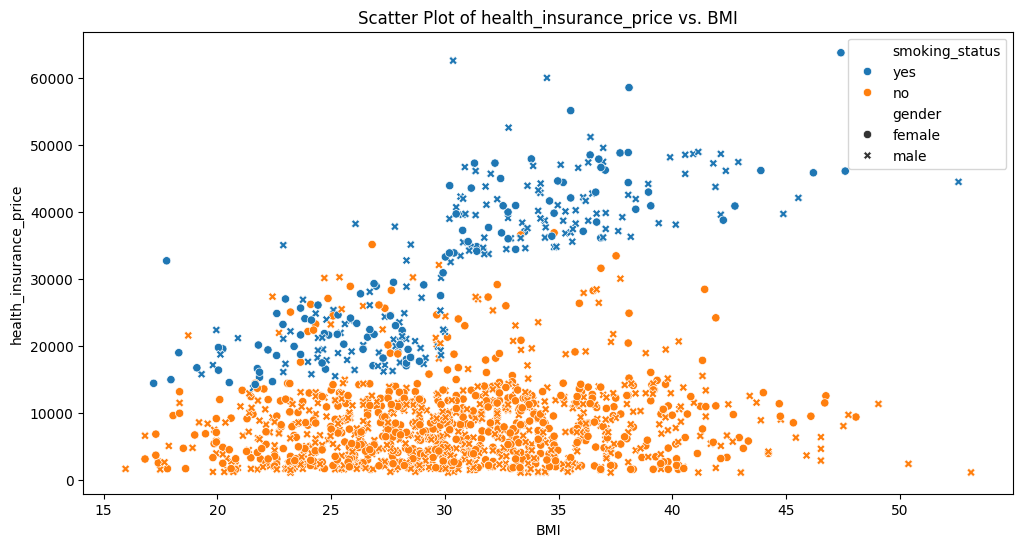

In [ ]:
# we will draw scatterplot to see whether the relation is linear or non linear
# Scatter plot for health_insurance_price vs. BMI
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='BMI', y='health_insurance_price',hue="smoking_status",style="gender")
plt.title("Scatter Plot of health_insurance_price vs. BMI")
plt.show()

##**Observations:**

From the above graph,it is clear that as the **as BMI is increasing, insurance cost is also increasing** with respect to smoking status too(smokers have high insurance price compared to non-smokers).

There is a **positive linear relationship between these two variables.**

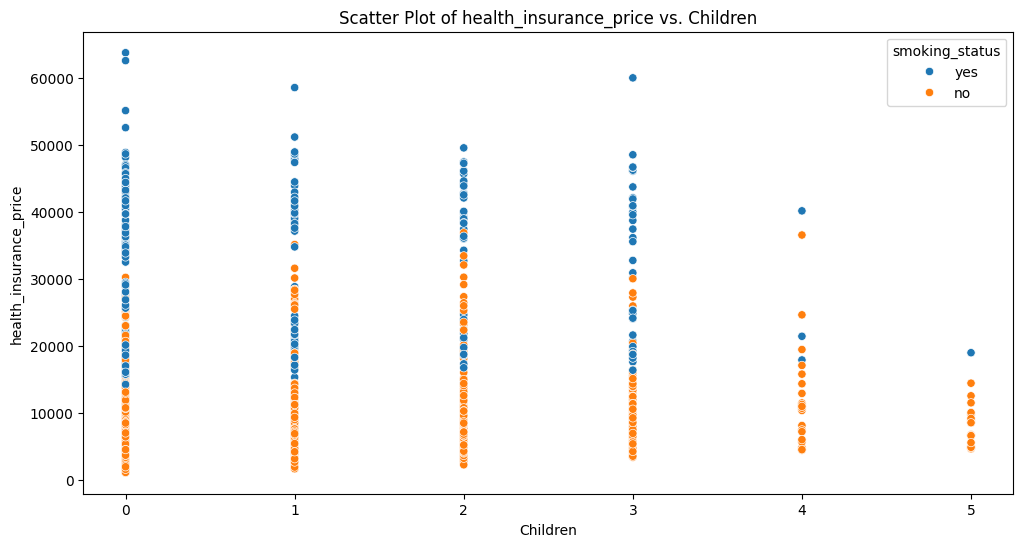

In [ ]:
# Scatter plot for health_insurance_price vs. Children
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Children', y='health_insurance_price',hue="smoking_status")
plt.title("Scatter Plot of health_insurance_price vs. Children")
plt.show()

###**Box plots to check for outliers**

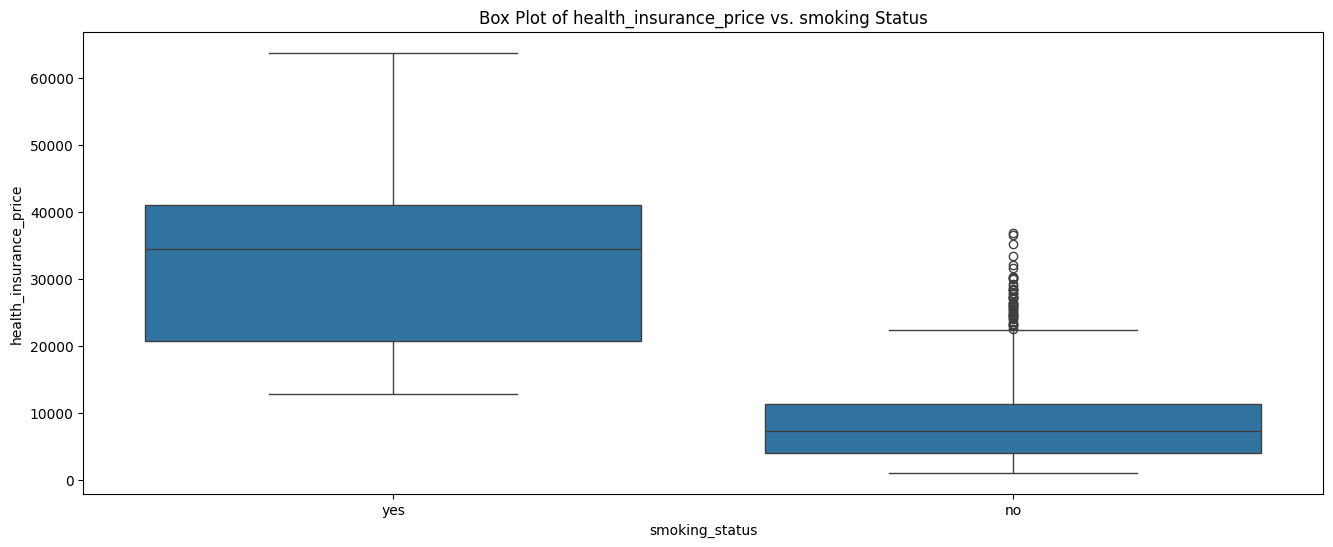

In [ ]:
# Box plot for health_insurance_price vs. smoking status
plt.figure(figsize=(16,6))
sns.boxplot(data=df,y='health_insurance_price',x="smoking_status")
plt.title("Box Plot of health_insurance_price vs. smoking Status")
plt.show()

##**Observations:**

From the above boxplot,it is clear that **smokers tend to pay far more insurance cost compared to non-smokers.**

The median for non smokers is no where near to smokers' insurance cost, so the smoking status largely impacts the insurance costs.

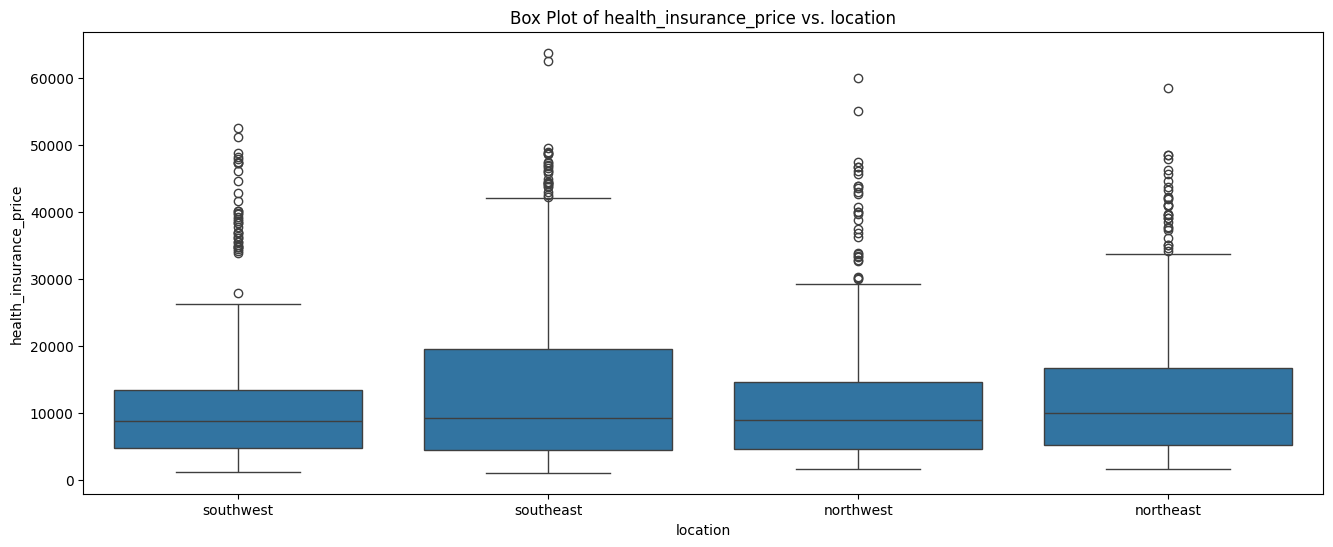

In [ ]:
# Box plot for health_insurance_price vs. Location
plt.figure(figsize=(16,6))
sns.boxplot(data=df,y='health_insurance_price',x="location")
plt.title("Box Plot of health_insurance_price vs. location")
plt.show()

##**Observations:**  

Except for the "south east" location, all other locations have almost equal influence on insurance price

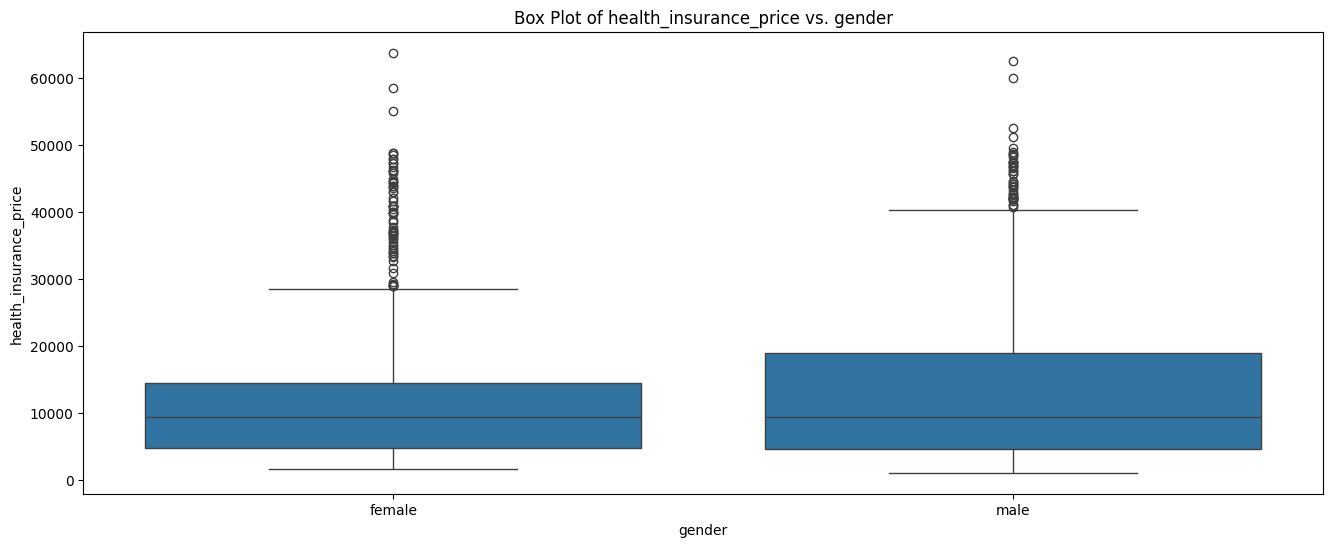

In [ ]:
# Box plot for health_insurance_price vs. gender
plt.figure(figsize=(16,6))
sns.boxplot(data=df,y='health_insurance_price',x="gender")
plt.title("Box Plot of health_insurance_price vs. gender")
plt.show()

##**Observations:**

From the box plots, **"males" tend to pay more insurance price** compared to "females", though their medians are almost same.

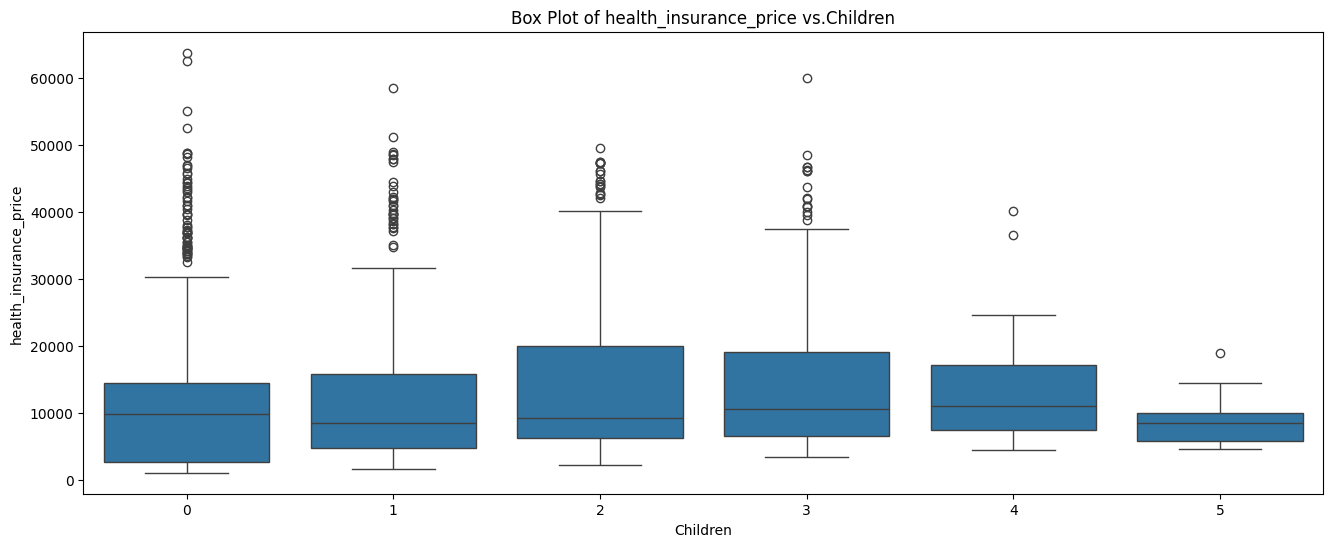

In [ ]:
# Box plot for health_insurance_price vs. Children
plt.figure(figsize=(16,6))
sns.boxplot(data=df,y='health_insurance_price',x="Children")
plt.title("Box Plot of health_insurance_price vs.Children")
plt.show()

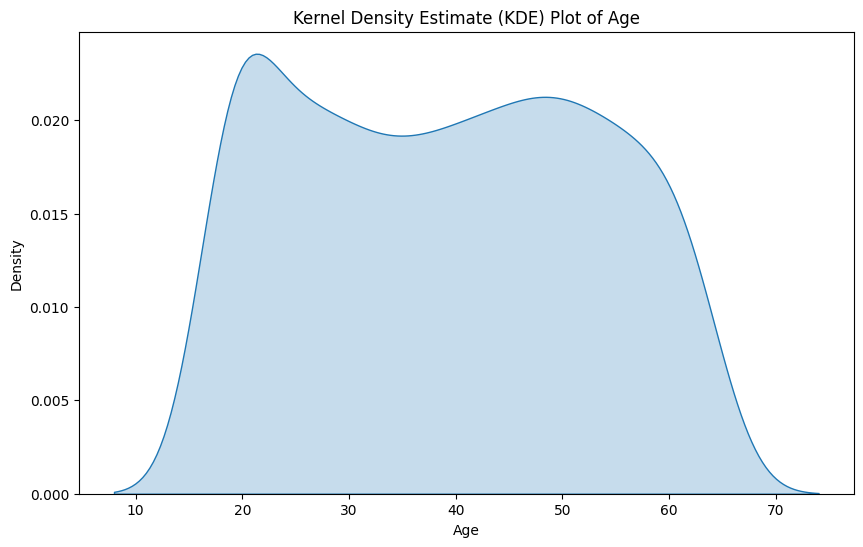

In [ ]:
# kde plot for "Age" column
plt.figure(figsize=(10, 6))
sns.kdeplot(df['age'], fill=True)
plt.title("Kernel Density Estimate (KDE) Plot of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

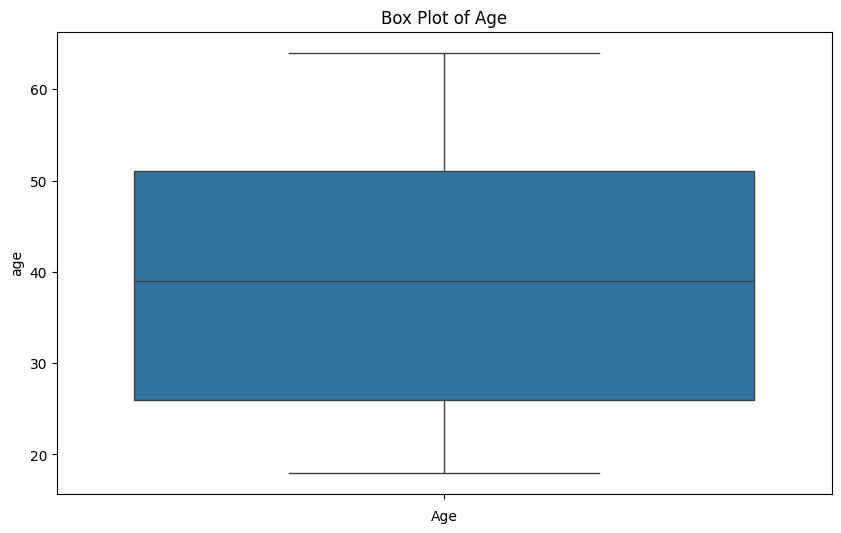

In [ ]:
# Boxplot for age column
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['age'])
plt.title("Box Plot of Age")
plt.xlabel("Age")
plt.show()

**Observation:** From the above graphs, it is evident that there are no outliers for "Age" column. Since there are no outliers, it is best to substitute the missing values with the mean of "Age" column.

In [ ]:
mean_age = df["age"].mean()
mean_age

39.16641221374046

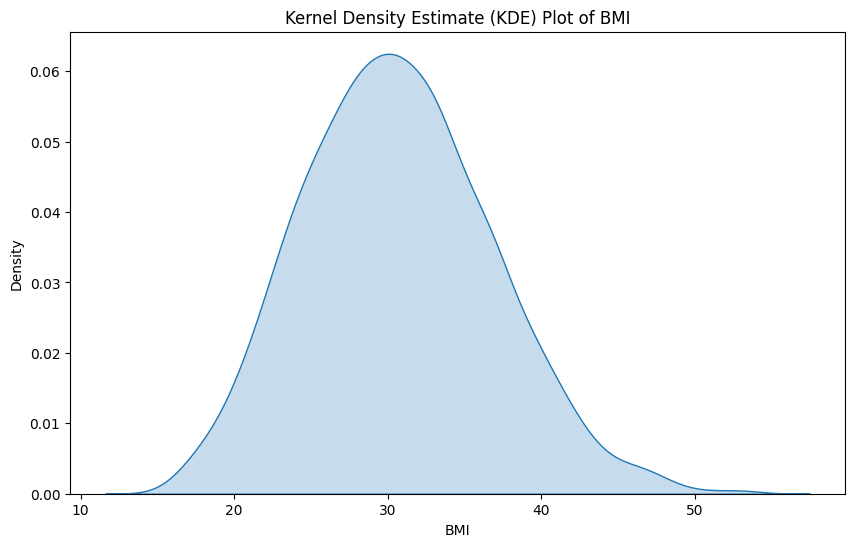

In [ ]:
# kde plot for "BMI" column
plt.figure(figsize=(10, 6))
sns.kdeplot(df['BMI'], fill=True)
plt.title("Kernel Density Estimate (KDE) Plot of BMI")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.show()

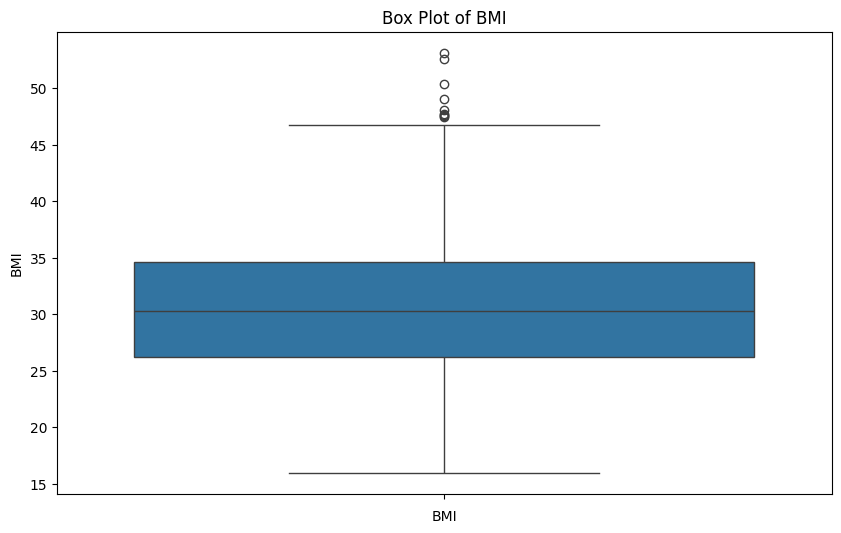

In [ ]:
# Boxplot for BMI column
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['BMI'])
plt.title("Box Plot of BMI")
plt.xlabel("BMI")
plt.show()

In [ ]:
mean_BMI = df["BMI"].mean()
mean_BMI

30.638216730038025

In [ ]:
median_BMI = df["BMI"].median()
median_BMI

30.305

**Observations:** From the above graphs, there are outliers above BMI of 50, and the graph is symmetrical with mean BMI as 30.64.

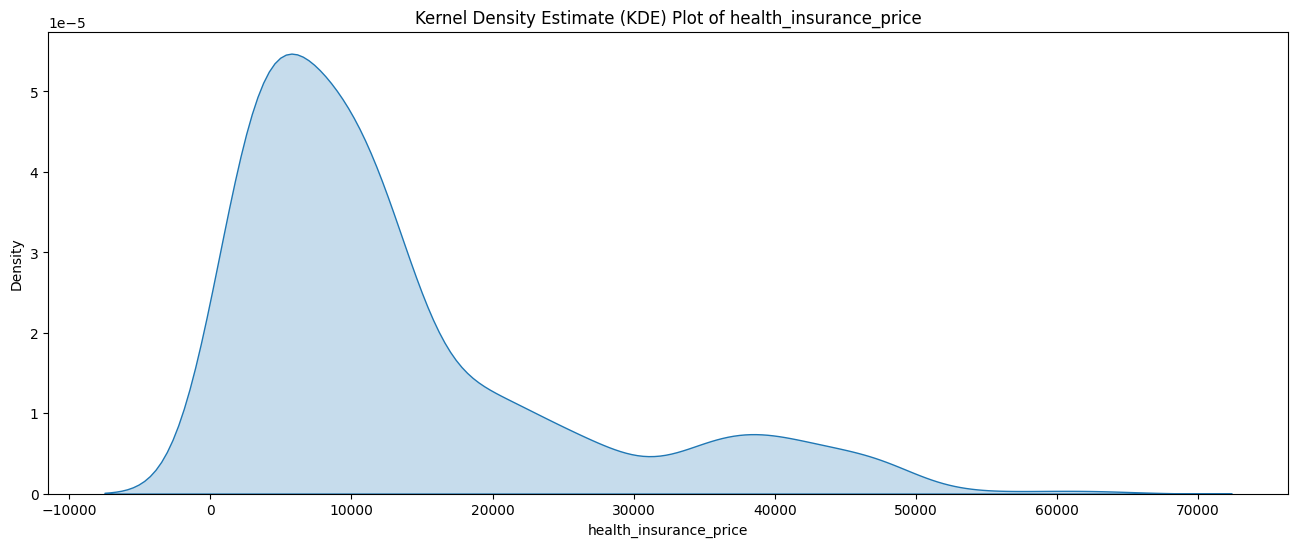

In [ ]:
# kde plot for "health_insurance_price" column
plt.figure(figsize=(16, 6))
sns.kdeplot(df['health_insurance_price'], fill=True)
plt.title("Kernel Density Estimate (KDE) Plot of health_insurance_price")
plt.xlabel("health_insurance_price")
plt.ylabel("Density")
plt.show()

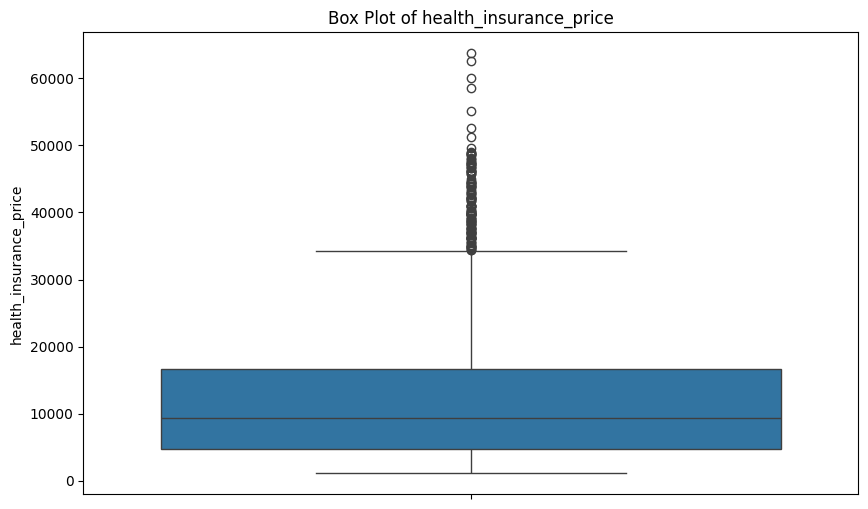

In [ ]:
# Boxplot for health_insurance_price column
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['health_insurance_price'])
plt.title("Box Plot of health_insurance_price")
plt.show()

In [ ]:
print(df['health_insurance_price'].mean())
print(df['health_insurance_price'].median())

13268.527719467815
9382.033


**Observations:** From the boxplot above, there are outliers for this column and graph is also right skewed.

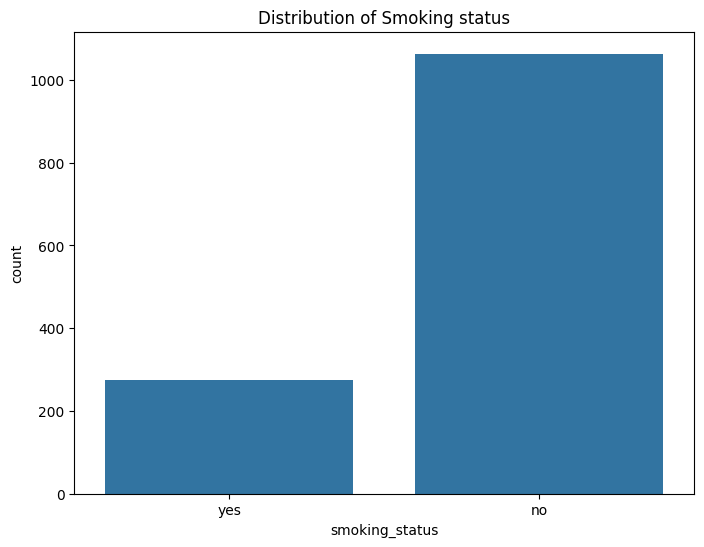

In [ ]:
# Countplot for the distribution of smoking status
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_status', data=df)
plt.title("Distribution of Smoking status")
plt.show()

**Observations:** Non smokers are more in number than smokers.

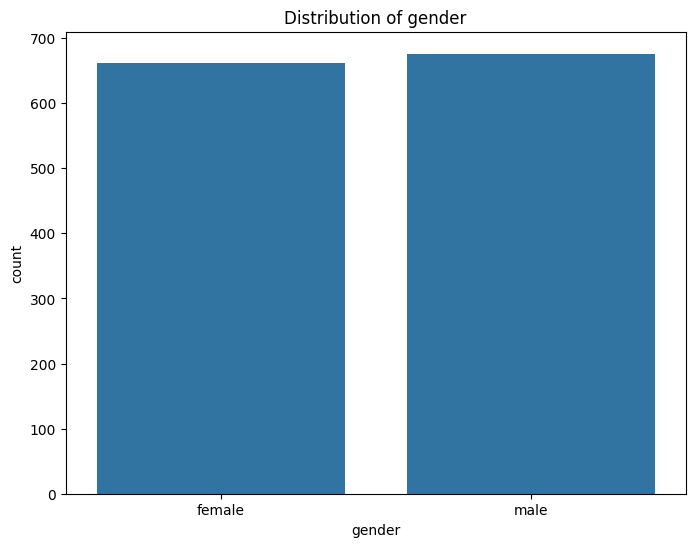

In [ ]:
# Countplot for the distribution of gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title("Distribution of gender")
plt.show()

**Observations:** Almost male,female numbers are same.

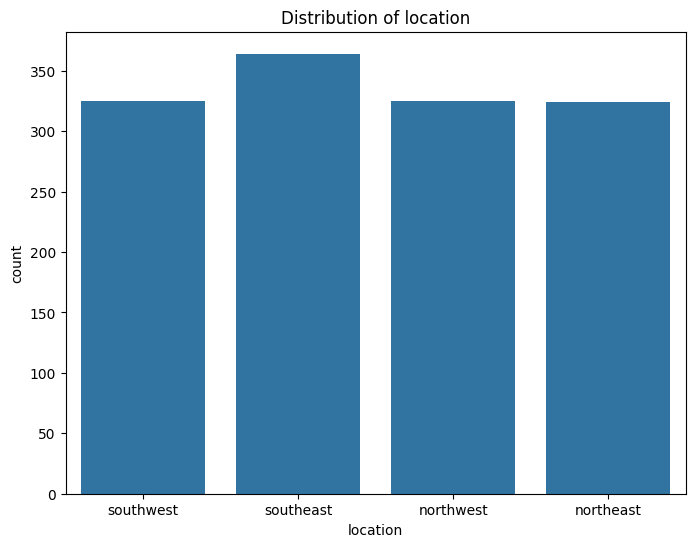

In [ ]:
# Countplot for the distribution of location
plt.figure(figsize=(8, 6))
sns.countplot(x='location', data=df)
plt.title("Distribution of location")
plt.show()

**Observations:** except for southeast location, all others are almost equal in number.

### ***Summary Statistics***

In [ ]:
df.describe(include="all")    # describe function gives the summary statistics, include= all includes the categorical columns as well.

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


#**Data Analysis Approach**
###**1) What approach are you going to take to prove or disprove your hypothesis?**

To prove or disprove hypothesis i will test with t-test and anova.

Null hypothesis would be "there is not much difference in the means within the different groups."

if p values is less than 0.05 i would reject the null hypothesis.

###**2) What feature engineering techniques will be relevant to your project?**

The binning, encoding, handling outliers, grouping, imputation suits the data set.

I havent done feature selection as there are very few columns(only 7) and each column has significance on target variable ie., health insurance price

###**3) Justify your data analysis approach.**

Since there are categorical values, i encoded them for model building.

i did binning for ease of calculations.

i imputed the null values with mean and medians. means are vulnerable to outliers so wherever i found outliers i imputed with median values.

###**4) Identify essential patterns in your data using the EDA approach to justify your findings.**

There is linear relation ship between age and price columns, bmi and price columns, smokers tend to pay more price than non smokers.

There are almost equal number of male and females, non smokers are more in number than smokers.

Except for southwest all other locations have almost equal share.

The highest correlation is between price and smoking status and least is between price and location.



In [ ]:
df1 = df.copy() # deep copying the data set into new variable df1
df1.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


##**Encoding the data to prepare it for model building(converting the categorical data to numerical)**

In [ ]:
df1['gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df1['gender']=df1['gender'].map({'female':0,'male':1})
df1['gender']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: gender, Length: 1338, dtype: int64

In [ ]:
df1['location'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df1['location'] = df1['location'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})
df1['location']

0       0
1       1
2       1
3       2
4       2
       ..
1333    2
1334    3
1335    1
1336    0
1337    2
Name: location, Length: 1338, dtype: int64

In [ ]:
df1['smoking_status'] = df1['smoking_status'].map({'yes':1,'no':0})
df1['smoking_status']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoking_status, Length: 1338, dtype: int64

In [ ]:
df1.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

##**Imputing the null values with their respective means and medians**

In [ ]:
df1['age'].fillna(df1['age'].mean(), inplace=True)
df1['BMI'].fillna(df1['BMI'].median(), inplace=True)
df1['health_insurance_price'].fillna(df1['health_insurance_price'].median(), inplace=True)

In [ ]:
df1.isnull().sum() # checking for null values after imputing the missing values

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

##**Hypothesis Testing**

###**1) Smoking status**

###**Null Hypothesis (H₀):**

"There is no significant difference in health insurance charges between smokers and non-smokers."

###**Alternative Hypothesis (H₁):**

"There is a significant difference in health insurance charges between smokers and non-smokers."

In [ ]:
dff = df.copy()
dff.isnull().sum()

In [ ]:
dff['age'].fillna(dff['age'].mean(), inplace=True)
dff['BMI'].fillna(dff['BMI'].median(), inplace=True)
dff['health_insurance_price'].fillna(dff['health_insurance_price'].median(), inplace=True)

In [ ]:
dff.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [ ]:
from scipy.stats import ttest_ind


smokers_charges = dff[dff['smoking_status'] == 'yes']['health_insurance_price']
non_smokers_charges = dff[dff['smoking_status'] == 'no']['health_insurance_price']

# Check for missing values
if smokers_charges.isnull().any() or non_smokers_charges.isnull().any():
    print("Warning: Missing values detected in the 'insurance_cost' column.")

# Check for identical values in both groups
if smokers_charges.equals(non_smokers_charges):
    print("Warning: Identical values in both groups.")

# Check group sizes
print(f"Number of Smokers: {len(smokers_charges)}")
print(f"Number of Non-Smokers: {len(non_smokers_charges)}")

# Perform t-test only if the group sizes are sufficient
if len(smokers_charges) > 1 and len(non_smokers_charges) > 1:
    # Perform t-test for independent samples
    t_stat, p_value = ttest_ind(smokers_charges, non_smokers_charges)
    print(f"T-statistic: {t_stat}\nP-value: {p_value}")
else:
    print("Insufficient samples for t-test.")

Number of Smokers: 274
Number of Non-Smokers: 1064
T-statistic: 46.40920332019198
P-value: 7.768361258130491e-281


In [ ]:
from scipy.stats import ttest_ind

# T-test for charges between smokers and non-smokers
smokers_charges = df1[df1['smoking_status'] == 1]['health_insurance_price']
non_smokers_charges = df1[df1['smoking_status'] == 0]['health_insurance_price']

t_stat, p_value = ttest_ind(smokers_charges, non_smokers_charges)
print(f"T-statistic: {t_stat}\np-value: {p_value}")

T-statistic: 46.40920332019198
p-value: 7.768361258130491e-281


##**Observations:**
Here the **p value is far less than 0.05**, so we can **reject the null hypothesis** which means it is highly unlikely to have occured by random chance and there is statistically significant difference in health insurance charges between smokers and non-smokers.

In [ ]:
import numpy as np
from scipy.stats import t

# Calculate confidence interval
mean_diff = np.mean(smokers_charges) - np.mean(non_smokers_charges)
std_error = np.sqrt(np.var(smokers_charges)/len(smokers_charges) + np.var(non_smokers_charges)/len(non_smokers_charges))
margin_of_error = t.ppf(0.975, df=len(smokers_charges)+len(non_smokers_charges)-2) * std_error
confidence_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error)
print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: (22135.79114129694, 24976.41663086672)


##**Hypothesis Testing 2**

###**2) Age**

###**Null Hypothesis (H₀):**

"There is no significant difference in health insurance charges based on age."

###**Alternative Hypothesis (H₁):**

"There is a significant difference in health insurance charges based on age."

In [ ]:
df1['age'].unique()

In [ ]:
# the bin edges and labels for age groups
bin_edges = [18, 30, 40, 50, 60, 70]
bin_labels = ['18-29', '30-39', '40-49', '50-59', '60-69']

# Creating a new column 'age_group' in the data frame df1
df1['age_group'] = pd.cut(df1['age'], bins=bin_edges, labels=bin_labels, right=False)

# the new 'age_group' column in df1
print(df1[['age', 'age_group']])

       age age_group
0     19.0     18-29
1     18.0     18-29
2     28.0     18-29
3     33.0     30-39
4     32.0     30-39
...    ...       ...
1333  50.0     50-59
1334  18.0     18-29
1335  18.0     18-29
1336  21.0     18-29
1337  61.0     60-69

[1338 rows x 2 columns]


In [ ]:
from scipy.stats import f_oneway

# Getting the health insurance prices for each age group from age_group column
group1_age = df1[df1['age_group'] == '18-29']['health_insurance_price']
group2_age = df1[df1['age_group'] == '30-39']['health_insurance_price']
group3_age = df1[df1['age_group'] == '40-49']['health_insurance_price']
group4_age = df1[df1['age_group'] == '50-59']['health_insurance_price']
group5_age = df1[df1['age_group'] == '60-69']['health_insurance_price']

# ANOVA testing, as there are more than two sub groups within the age_group column
f_stat_age, p_value_age = f_oneway(group1_age, group2_age, group3_age, group4_age, group5_age)
print(f"F-statistic for age: {f_stat_age}\nP-value for age: {p_value_age}")

F-statistic for age: 32.65597674937154
P-value for age: 5.274364704936268e-26


##**Observations:**

Here, the **F-statistic value is larger**, so it means there
is **greater difference between the group means comapred to variability within the group means.**

Here, the p value is **far less than 0.05** which suggests that **all group means are not equal** ,ie., there is variation in the insurance costs with respect to age groups. That is why we **reject the null hypothesis.**

##**Hypothesis Testing 3**

###**3) Gender**

###**Null Hypothesis (H₀):**

"There is no significant difference in health insurance charges based on Gender."

###**Alternative Hypothesis (H₁):**

"There is a significant difference in health insurance charges based on Gender."

In [ ]:
from scipy.stats import ttest_ind

male_charges = dff[dff['gender'] == 'male']['health_insurance_price']
female_charges = dff[dff['gender'] == 'female']['health_insurance_price']

# Check for missing values
if male_charges.isnull().any() or female_charges.isnull().any():
    print("Warning: Missing values detected in the 'insurance_cost' column.")

# Check for identical values in both groups
if male_charges.equals(female_charges):
    print("Warning: Identical values in both groups.")

# Check group sizes
print(f"Number of Smokers: {len(male_charges)}")
print(f"Number of Non-Smokers: {len(female_charges)}")

# Perform t-test only if the group sizes are sufficient
if len(male_charges) > 1 and len(female_charges) > 1:
    # Perform t-test for independent samples
    t_stat, p_value = ttest_ind(male_charges, female_charges)
    print(f"T-statistic: {t_stat}\nP-value: {p_value}")
else:
    print("Insufficient samples for t-test.")

Number of Smokers: 676
Number of Non-Smokers: 662
T-statistic: 2.1441030645773704
P-value: 0.03220464412823545


In [ ]:
from scipy.stats import ttest_ind

# T-test for charges between smokers and non-smokers
male_charges = df1[df1['gender'] == 1]['health_insurance_price']
female_charges = df1[df1['gender'] == 0]['health_insurance_price']

t_stat, p_value = ttest_ind(male_charges, female_charges)
print(f"T-statistic: {t_stat}\np-value: {p_value}")

T-statistic: 2.1441030645773704
p-value: 0.03220464412823545


##**Observations:**

Here, the p-value is **lesser than 0.05**, which means we can **reject null hypothesis** and can say that there is **significant difference in the insurance prices with respect to gender**.

##**Hypothesis Testing 4**

###**4) BMI**

###**Null Hypothesis (H₀):**

"There is no significant difference in health insurance charges based on BMI of each individual."

###**Alternative Hypothesis (H₁):**

"There is a significant difference in health insurance charges based on BMI of each individual."

In [ ]:
df1['BMI'].min()

15.96

In [ ]:
df1['BMI'].max()

53.13

In [ ]:
from scipy.stats import f_oneway

# creating the bin edges and labels for BMIs'
bin_edges_BMI = [15, 18.5, 25, 30, 35, 40, 50, 60]
bin_labels_BMI = ['<18.5', '18.5-25', '25-30', '30-35', '35-40', '40-50', '>50']

# Creating a new column 'bmi_group' in df1 grouping the BMIs'
df1['BMI_group'] = pd.cut(df1['BMI'], bins=bin_edges_BMI, labels=bin_labels_BMI, right=False)

# getting the health insurance prices for each BMI group
group1_bmi = df1[df1['BMI_group'] == '<18.5']['health_insurance_price']
group2_bmi = df1[df1['BMI_group'] == '18.5-25']['health_insurance_price']
group3_bmi = df1[df1['BMI_group'] == '25-30']['health_insurance_price']
group4_bmi = df1[df1['BMI_group'] == '30-35']['health_insurance_price']
group5_bmi = df1[df1['BMI_group'] == '35-40']['health_insurance_price']
group6_bmi = df1[df1['BMI_group'] == '40-50']['health_insurance_price']
group7_bmi = df1[df1['BMI_group'] == '>50']['health_insurance_price']

# Performing the ANOVA test
f_stat_bmi, p_value_bmi = f_oneway(group1_bmi,group2_bmi,group3_bmi,group4_bmi,group5_bmi,group6_bmi,group7_bmi)
print(f"F-statistic for BMI: {f_stat_bmi}\nP-value for BMI: {p_value_bmi}")


F-statistic for BMI: 10.467815052486513
P-value for BMI: 2.270336438277342e-11


##**Observations:**

Since the **p-value is significantly smaller** than a common significance level (e.g.,0.05), you would **reject the null hypothesis.**

Therefore,we can infer that there **is a significant difference in health insurance prices among the different BMI categories.**

##**Hypothesis Testing 5**

###**5) Location**

###**Null Hypothesis (H₀):**

"There is no significant difference in health insurance charges based on location of each individual."

###**Alternative Hypothesis (H₁):**

"There is a significant difference in health insurance charges based on location of each individual."

In [ ]:
df1['location'].unique()

array([0, 1, 2, 3])

In [ ]:
dff['location'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
from scipy.stats import f_oneway

# Creating the location groups based on numerical mapping
group0_location = dff[dff['location'] == 'southwest']['health_insurance_price']
group1_location = dff[dff['location'] == 'southeast']['health_insurance_price']
group2_location = dff[dff['location'] == 'northwest']['health_insurance_price']
group3_location = dff[dff['location'] == 'northeast']['health_insurance_price']

# Performing the ANOVA
f_stat_location, p_value_location = f_oneway(group0_location, group1_location, group2_location, group3_location)
print(f"F-statistic for location: {f_stat_location}\nP-value for location: {p_value_location}")

F-statistic for location: 3.0127490028623436
P-value for location: 0.02914314721581833


In [ ]:
from scipy.stats import f_oneway

# Creating the location groups based on numerical mapping
group0_location = df1[df1['location'] == 0]['health_insurance_price']
group1_location = df1[df1['location'] == 1]['health_insurance_price']
group2_location = df1[df1['location'] == 2]['health_insurance_price']
group3_location = df1[df1['location'] == 3]['health_insurance_price']

# Performing the ANOVA
f_stat_location, p_value_location = f_oneway(group0_location, group1_location, group2_location, group3_location)
print(f"F-statistic for location: {f_stat_location}\nP-value for location: {p_value_location}")

F-statistic for location: 3.0127490028623436
P-value for location: 0.02914314721581833


##**Observations:**

The results(p-value less than 0.05 and f-statistic is 3) suggest that there are **significant differences in health insurance prices among the four locations**, inturn **rejecting the null hypothesis.**

In other words, **at least one location has a different mean health insurance price compared to the others.**

##**Hypothesis Testing 6**

###**5) Children**

###**Null Hypothesis (H₀):**

"There is no significant difference in health insurance charges based on number of dependents on the client ie., his/her children."

###**Alternative Hypothesis (H₁):**

"There is a significant difference in health insurance charges based on number of dependents on the client ie., his/her children."

In [ ]:
df1['Children'].unique()

array([0, 1, 3, 2, 5, 4])

In [ ]:
from scipy.stats import f_oneway

# Creating the children groups based on numerical mapping
group0 = df1[df1['Children'] == 0]['health_insurance_price']
group1 = df1[df1['Children'] == 1]['health_insurance_price']
group2 = df1[df1['Children'] == 2]['health_insurance_price']
group3 = df1[df1['Children'] == 3]['health_insurance_price']
group4 = df1[df1['Children'] == 4]['health_insurance_price']
group5 = df1[df1['Children'] == 5]['health_insurance_price']

# Performing the ANOVA
f_stat_location, p_value_location = f_oneway(group0,group1,group2,group3,group4,group5)
print(f"F-statistic for Children: {f_stat_location}\nP-value for Children: {p_value_location}")

F-statistic for Children: 3.217765974492355
P-value for Children: 0.006814379271082097


##**Observations:**

The results (F-statistic is 3.2 ,P-value is 0.0068 which is far less than 0.05)suggest that there are **significant differences in health insurance prices based on the number of children**.

In other words, the **mean health insurance price is not the same for all groups defined by the number of children.** Thus we **reject the null hypothesis.**

<ipython-input-276-4b00b73c6c23>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


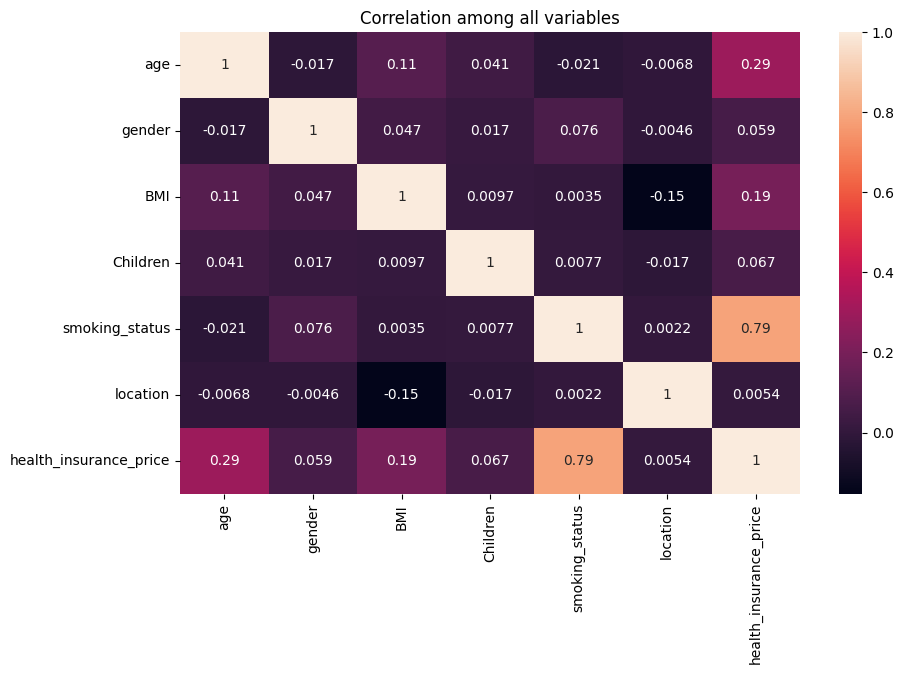

In [ ]:
# creating a heat map to see strength of correlations
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True)
plt.title("Correlation among all variables")
plt.show()

##**Observations:**

From the heatmap, it is clear that the **correlation coefficient for Insurance price and Smoking status is high (0.79)** which is **highest** amongst all variables.

And the **least** correlation coefficient is for **location and insurance price which is 0.0054.** followed by **children**(0.067), **gender**(0.059), **BMI**(0.19) and **age**(0.29) columns.

###**4- Please perform multiple machine learning models, perform all required steps to check if there are any assumptions, and justify your model. Why is your model better than any other possible model? Please explain it by relevant cost functions and, if possible, by any graph.**

##**MODEL SELECTION & BUILDING**

##**Training and Testing data**

In [ ]:
df1 = df1.drop(columns=['age_group','BMI_group'],axis=1)

In [ ]:
df1.head(1)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,30.305,0,1,0,16884.924


In [ ]:
# splitting the train and test data
X = df1.drop(columns=['health_insurance_price'],axis=1)
X  # Feature Matrix

,age,gender,BMI,Children,smoking_status,location
0,19.0,0,30.305,0,1,0
1,18.0,1,33.770,1,0,1
2,28.0,1,33.000,3,0,1
3,33.0,1,22.705,0,0,2
4,32.0,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,2
1334,18.0,0,31.920,0,0,3
1335,18.0,0,36.850,0,0,1
1336,21.0,0,25.800,0,0,0


In [ ]:
y = df1['health_insurance_price']
y  # Target variable as vector

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: health_insurance_price, Length: 1338, dtype: float64

In [ ]:
# importing the module train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# To train the models on training set(X_train,y_train) and test the models on testing set(X_test,y_test)

# Choosing 20% of data set to test the model and 80% of data to train the model.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=True)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test

## **Machine Learning Approach:**

###**1)What method will you use for machine learning-based predictions of health insurance price?**

*Since the target variable **"Health Insurance Price" is continous numerical**, I would choose **Regression** based models for building a machine learning model.*

***They are:***


1.   Linear Regression
2.   Support Vector Regression
3.   Random Forest Regression
4.   Gradient Boost Regression
5.   XGBoost Regression Models



##**Importing the necessary Models**

In [ ]:
# importing Linear Regression Model
from sklearn.linear_model import LinearRegression

# importing Support Vector Regression Model
from sklearn.svm import SVR

# importing Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor

# importing Gradient Boosting Regressor Model
from sklearn.ensemble import GradientBoostingRegressor

# importing XGB Regressor Model
from xgboost import XGBRegressor

##**Model Training**

**Creating objects for each Class and training the data.**

In [ ]:
Lin_Reg = LinearRegression()  # object/instance is created ie., Lin_Reg
Lin_Reg.fit(X_train,y_train)  # training the data

LinearRegression()

In [ ]:
Svm = SVR()                  # object/instance is created ie., Svm
Svm.fit(X_train,y_train)     # training the data

SVR()

In [ ]:
R_Forest = RandomForestRegressor()  # object/instance is created ie., R_Forest
R_Forest.fit(X_train,y_train)       # training the data

RandomForestRegressor()

In [ ]:
Grad_B = GradientBoostingRegressor() # object/instance is created ie., Grad_B
Grad_B.fit(X_train,y_train)          # training the data

GradientBoostingRegressor()

In [ ]:
XG_B = XGBRegressor()               # object/instance is created ie., XG_B
XG_B.fit(X_train,y_train)           # training the data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

##**Prediction on Test Data**

In [ ]:
# predicting y values using different models

y_pred_Lin = Lin_Reg.predict(X_test)    # predict function gives the predicted values from the trained models
y_pred_Svm = Svm.predict(X_test)
y_pred_RF = R_Forest.predict(X_test)
y_pred_GB = Grad_B.predict(X_test)
y_pred_XG = XG_B.predict(X_test)

##**Comparing actual 'y_test' values with 'predicted-y' values from various models**

In [ ]:
# creating a data frame to see the values for predicted and actual values.
df2 = pd.DataFrame({"Actual_y":y_test,"Lin_Reg":y_pred_Lin,"SVM":y_pred_Svm,"RF":y_pred_RF,"GrB":y_pred_GB,"XGB":y_pred_XG})

In [ ]:
df2

,Actual_y,Lin_Reg,SVM,RF,GrB,XGB
559,1646.42970,4385.960040,9113.413796,1578.934248,3125.107244,2048.614258
1087,11353.22760,12841.966656,9324.908404,12352.255988,12169.755407,13035.699219
1020,8798.59300,10271.656763,9289.913273,9596.565316,10123.888299,6752.258789
460,10381.47870,11537.499582,9277.040487,10476.925865,11494.552559,8546.100586
802,2103.08000,5174.206199,9206.414958,5693.575321,8091.594637,5665.236816
...,...,...,...,...,...,...
682,40103.89000,33237.763969,9211.738101,41920.769315,40966.558546,41681.593750
629,42983.45850,35714.465548,9247.729615,47038.784416,44491.982980,45752.261719
893,44202.65360,34738.502623,9215.354855,41428.426442,41849.031583,39856.656250
807,2136.88225,4936.658260,9114.577205,2129.060424,4297.909370,3890.011230


##**Comparing the values visually using graphs**

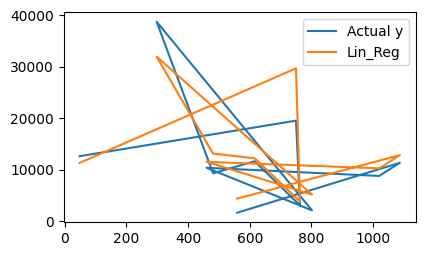

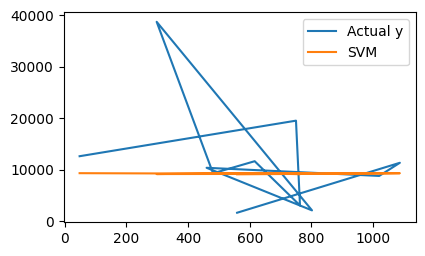

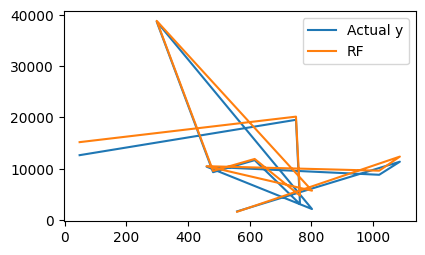

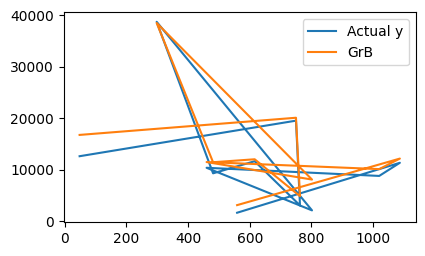

In [ ]:
# drawing plots for visual comparision of predicted and actual values
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.plot(df2['Actual_y'].iloc[0:11],label="Actual y")
plt.plot(df2['Lin_Reg'].iloc[0:11],label="Lin_Reg")
plt.legend()

plt.figure(figsize=(10,6))
plt.subplot(222)
plt.plot(df2['Actual_y'].iloc[0:11],label="Actual y")
plt.plot(df2["SVM"].iloc[0:11],label="SVM")
plt.legend()

plt.figure(figsize=(10,6))
plt.subplot(223)
plt.plot(df2['Actual_y'].iloc[0:11],label="Actual y")
plt.plot(df2["RF"].iloc[0:11],label="RF")
plt.legend()

plt.figure(figsize=(10,6))
plt.subplot(224)
plt.plot(df2['Actual_y'].iloc[0:11],label="Actual y")
plt.plot(df2["GrB"].iloc[0:11],label="GrB")
plt.legend()

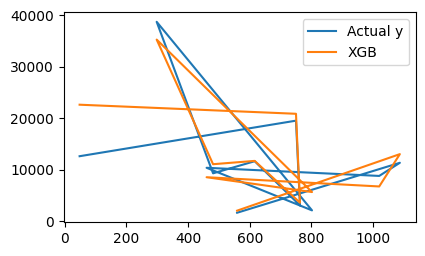

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.plot(df2['Actual_y'].iloc[0:11],label="Actual y")
plt.plot(df2['XGB'].iloc[0:11],label="XGB")
plt.legend()

##**Please justify the most appropriate model.**

*From the above graphs, we can **reject the Support Vector Model** as it is showing a **constant value** for different values which in reality is not practical.*

*Visually the Random Forest, Linear Regression, Gradient Boost, XGBoost are more **closer to the actual y_test** values.*

##**Please compare all models (at least four models).**

*But before concluding the best model only by the graphs,we should check for various **metrics** like **r2_score, Mean absolute error, Mean squared error** also.*

###**Evaluating the models using metrics:**

###**Finding the r2_scores for each model using "r2_score" function**

In [ ]:
from sklearn import metrics

In [ ]:
r2_lin = metrics.r2_score(y_test,y_pred_Lin)
r2_svm = metrics.r2_score(y_test,y_pred_Svm)
r2_rf = metrics.r2_score(y_test,y_pred_RF)
r2_gb = metrics.r2_score(y_test,y_pred_GB)
r2_XGB = metrics.r2_score(y_test,y_pred_XG)

In [ ]:
print(r2_lin,r2_svm,r2_rf,r2_gb,r2_XGB)

0.7525090370101217 -0.11520773048234778 0.843889171812886 0.8619277881663322 0.8007861767375322


##**Observations:**

From the above values, **r2_score is highest for "Gradient Boost Regression model"** followed by Random Forest Regression.

But we should not conclude here itself, rather **check for mean absolute and mean squared errors too.**

###**Finding Mean Absolute Errors**

In [ ]:
from sklearn import metrics

In [ ]:
mae1 = metrics.mean_absolute_error(y_test,y_pred_Lin)    # mean_absolute_error function
mae2 = metrics.mean_absolute_error(y_test,y_pred_Svm)
mae3 = metrics.mean_absolute_error(y_test,y_pred_RF)
mae4 = metrics.mean_absolute_error(y_test,y_pred_GB)
mae5 = metrics.mean_absolute_error(y_test,y_pred_XG)

In [ ]:
print(mae1,mae2,mae3,mae4,mae5)

4120.931912649471 8284.307322733386 2731.921476161454 2491.6794839377308 3280.228407652879


##**Observations:**

The mean absolute error is **lowest for Gradient Boost regressor**, so this model can become one of the best fit models.

###**Finding Mean Squared Errors:**

In [ ]:
mse1 = metrics.mean_squared_error(y_test,y_pred_Lin)       # mean squared error function
mse2 = metrics.mean_squared_error(y_test,y_pred_Svm)
mse3 = metrics.mean_squared_error(y_test,y_pred_RF)
mse4 = metrics.mean_squared_error(y_test,y_pred_GB)
mse5 = metrics.mean_squared_error(y_test,y_pred_XG)

In [ ]:
print(mse1,mse2,mse3,mse4,mse5)

36945609.25286246 166478923.30459526 23304324.281843536 20611508.094918873 29738766.955805752


##**Observations:**

The mean squared error is **lowest for Gradient Boost regressor**, so this model can become one of the best fit models.

#**Best Fit Model:**

From the visualisation using graphs, r2_score, Mean Absolute Errors, Mean Squared Errors we can conclude that the **with high r2_score(0.8619)** and **lowest errors** compared with other 4 models, **"*Gradient Boost Model*"** is the best fit.

###**Insurance cost prediction for a new customer using the Gradient Boost Model:**

In [ ]:
df1.head(1)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,30.305,0,1,0,16884.924


**Creating new customer's data:**

In [ ]:
New_Customer = {'age':52,"gender":1,"BMI":30,"Children":2,"smoking_status":0,"location":2}

df3 = pd.DataFrame(New_Customer,index=[0])
df3

,age,gender,BMI,Children,smoking_status,location
0,52,1,30,2,0,2


In [ ]:
Price_Pred = Grad_B.predict(df3)
print(Price_Pred)

[13509.93833981]


**So, the price predicted for the given data with no smoking status is $13509.94**

Let's check for smoking status as yes for same person.

In [ ]:
New_Customer = {'age':52,"gender":1,"BMI":30,"Children":2,"smoking_status":1,"location":2}

df4 = pd.DataFrame(New_Customer,index=[0])
df4

,age,gender,BMI,Children,smoking_status,location
0,52,1,30,2,1,2


In [ ]:
Price_Pred = Grad_B.predict(df4)
print(Price_Pred)

[25877.47705142]


**The price predicted for smoker is $25877.47.
Clearly, the smokers have to pay more price for insurance compared to non-smokers.**